<a href="https://colab.research.google.com/github/daffapraramadhana/TubesMechineLearning/blob/main/tubes_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Color Identification using Machine Learning
# kelompok 11 Mechine Learning


*   Daffa Praramadhana 119140172
*   Muhammad veldyen 119140147



dalam project tugas besar kali ini, kami 
menggunakan algoritma mechine learning `KMeans` untuk mengekstraksi warna dari gambar yang diberikan. kami menggunakan `OpenCV` sebagai library yang dapat memanipulasi gambar, menerapkan KMeans untuk mengidentifikasi warna utama dan kemudian memplotkan informasi menggunakan `Matplotlib`.

## Import libraries

pertama-tama kami meng import library yang akan digunakan yaitu
*   `sklearn` untuk algoritma KMeans
*   `matplotlib.pyplot` untuk plotting grafik
*   `numpy` untuk bekerja dengan array
*   `cv2` untuk bekerja dengan data gambar
*   `collections` untuk menghitung value 
*   `rgb2lab` untuk meng covert RGB 
*   `deltaE_cie76` untuk menghitung similarity diantara warna










In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76

%matplotlib inline

## Working with OpenCV

Proses pembacaan sample gambar

The type of this input is <class 'numpy.ndarray'>
Shape: (487, 487, 3)


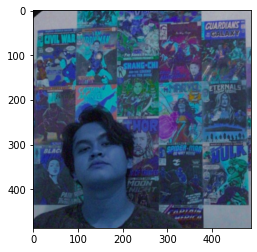

In [ ]:
image = cv2.imread('rapel.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

Dapat dilihat bahwa gambar tersebut memiliki warna yang berbeda dibandingkan dengan gambar aslinya. Ini karena secara default OpenCV membaca gambar dalam urutan warna `BIRU HIJAU MERAH` yaitu BGR. Jadi, kita perlu mengubahnya menjadi `REG GREEN BLUE` yaitu RGB.

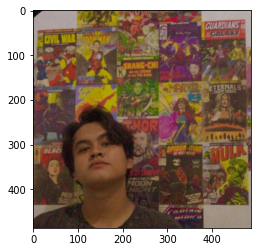

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

gambar juga dapat di convert menjadi greyscale jika dibuthkan

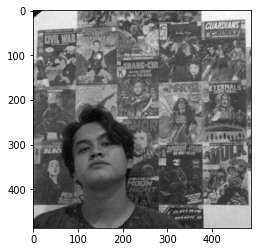

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

Kami mungkin ingin mengubah ukuran gambar ke ukuran tertentu setiap kali gambar berukuran besar atau saat kami bekerja dengan banyak gambar dengan dimensi berbeda.

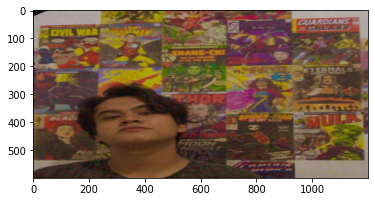

In [ ]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

## Color Identification

Setelah mengenal sedikit banyak tentang Opencv, kami akan memulai proses identifikasi warna

Pertama, kami akan mendefinisikan sebuah fungsi yang dapat memberi kami nilai `hex` dari warna yang akan kami identifikasi.

In [ ]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

KMeans mengharapkan flattened array sebagai input selama metode fit-nya. Jadi, kami perlu membentuk ulang gambar menggunakan numpy. Kemudian, kami dapat menerapkan KMeans untuk menyesuaikan terlebih dahulu dan kemudian memprediksi gambar untuk mendapatkan hasilnya. Kemudian, warna cluster diidentifikasi dan disusun dalam urutan yang benar. Kami memplot warna sebagai diagram lingkaran.


kami telah menggambungkan proses tersebut dalam dua metode

In [ ]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [ ]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
    
    return rgb_colors

In [ ]:
get_colors(get_image('sample_image.jpg'), 8, True)

error: ignored

## Search images using Color

Dari model diatas kami dapat mengambil warna utama. berdasarkan model tersebut kami dapat meciptakan peluang untuk mencari gambar berdasarkan warna tertentu. kami dapat memilih warna dan jika hex cocok atau mendekati hex warna utama gambar, dapat di katakan cocok.

kita pertama tama mendapatkan semua gambar dan menyimpannya dalam variabel `images`.

In [ ]:
import os

IMAGE_DIRECTORY = 'images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

We can now see all the images.

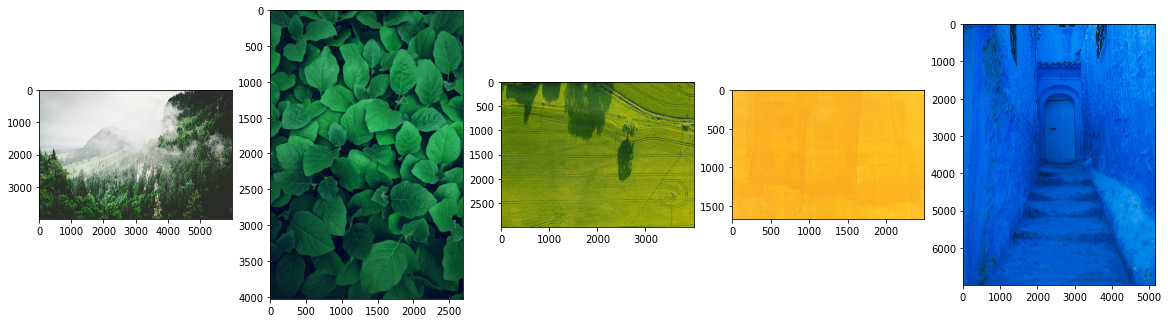

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i])

kami mendefinisikan fuction dibawah ini. kami akan mencoba mencocokan dengan 10 warna gambar teratas. sangat mungkin bahwa tidak akan ada kecocokan yang akurat untuk kode hex, jadi kami menghitung kesamaan antara warna yang dipilih dan warna gambar.

kami mempertahankan nilai ambang sehingga jika terdapat perbedaan antara warna yang dipilih dan salah satu warna yang dipilih kurang dari ambang tersebut, kami menyatakan sebagai kecocokan 


Nilai hex atau nilai RGB tidak dapat dibandingkan secara langsung, jadi pertama-tama kami mengonversinya menjadi ruang seragam warna dan independen perangkat. Kami menggunakan `rgb2lab` untuk mengonversi nilai dan kemudian menemukan perbedaannya menggunakan `deltaE_cie76`. Metode ini menghitung perbedaan antara semua 5 warna teratas dari gambar dan warna yang dipilih dan jika setidaknya satu di bawah ambang batas, kami menampilkan gambar tersebut.


In [ ]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

Kami memanggil metode di atas untuk semua gambar di set kami dan menunjukkan gambar yang relevan dari yang sama yang kira-kira cocok dengan warna yang kami pilih.

In [ ]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

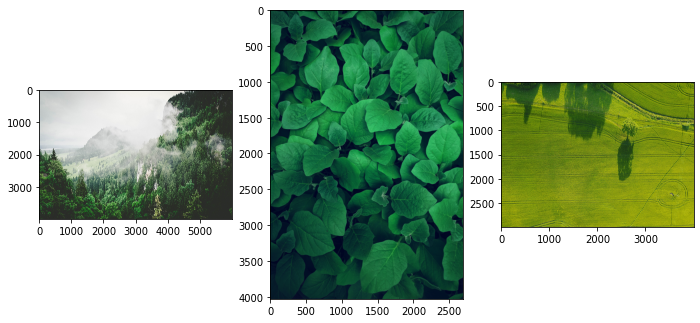

In [ ]:
# Search for GREEN
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

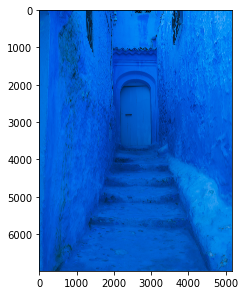

In [ ]:
# Search for BLUE
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

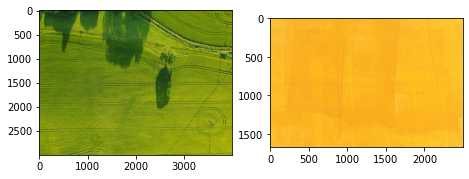

In [ ]:
# Search for YELLOW
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)

## Conclusion

Di notebook ini, kami menggunakan KMeans untuk mengekstrak sebagian besar warna dari gambar. Kami kemudian menggunakan Nilai Warna RGB untuk mengidentifikasi gambar dari koleksi yang memiliki warna tersebut di dalamnya.
